<a href="https://colab.research.google.com/github/Afitr06/backpropagatin3/blob/main/predikat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import packages
import pandas as pd
import numpy as np

In [23]:
#memasukan data
predikat = pd.read_csv ('data.csv')
predikat
# membaca 5 data

predikat.head()

,NPM,Nama Lengkap,IPK1,IPK2,IPK3,IPK4,IPK5,IPK6,IPK7,IPK8,Status
0,1706003,Adam Fakhrul Rozi,3.04,3.14,2.94,2.93,2.93,2.99,3.02,3.08,L
1,1706004,Rival Firmansyah,3.10,3.10,3.11,3.06,3.08,3.13,3.18,3.25,L
2,1706005,Ihsan Nugraha,3.92,3.89,3.86,3.83,3.86,3.86,3.86,3.87,L
3,1706007,Rizky Safta Maolani,3.57,3.49,3.41,3.35,3.43,3.43,3.45,3.47,L
4,1706009,Abdul Kamaludin,3.10,3.30,3.21,3.25,3.32,3.37,3.39,3.44,L


In [24]:
# melihat data yang akan di gunakan
predikat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NPM           675 non-null    int64  
 1   Nama Lengkap  675 non-null    object 
 2   IPK1          675 non-null    float64
 3   IPK2          675 non-null    float64
 4   IPK3          675 non-null    float64
 5   IPK4          675 non-null    float64
 6   IPK5          675 non-null    float64
 7   IPK6          675 non-null    float64
 8   IPK7          670 non-null    float64
 9   IPK8          547 non-null    float64
 10  Status        675 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 58.1+ KB


In [25]:
def ubahPredikat(data):
  predikat = []
  i = 0;
  for ipk in data: 
    if ipk >= 3.5 and ipk < 4.0:
      predikat.append(3);
    elif ipk >= 2.75 and ipk < 3.5:
      predikat.append(2)
    elif ipk >= 2.50 and ipk < 2.75:
      predikat.append(1)
    else:
      predikat.append(0)
  
  return predikat

predikat['pred'] = ubahPredikat(predikat["IPK8"])

In [26]:
predikat.head()

,NPM,Nama Lengkap,IPK1,IPK2,IPK3,IPK4,IPK5,IPK6,IPK7,IPK8,Status,pred
0,1706003,Adam Fakhrul Rozi,3.04,3.14,2.94,2.93,2.93,2.99,3.02,3.08,L,2
1,1706004,Rival Firmansyah,3.10,3.10,3.11,3.06,3.08,3.13,3.18,3.25,L,2
2,1706005,Ihsan Nugraha,3.92,3.89,3.86,3.83,3.86,3.86,3.86,3.87,L,3
3,1706007,Rizky Safta Maolani,3.57,3.49,3.41,3.35,3.43,3.43,3.45,3.47,L,2
4,1706009,Abdul Kamaludin,3.10,3.30,3.21,3.25,3.32,3.37,3.39,3.44,L,2


In [27]:
# menentukan variable
x = predikat.iloc[:,2:7]
x.head()

,IPK1,IPK2,IPK3,IPK4,IPK5
0,3.04,3.14,2.94,2.93,2.93
1,3.10,3.10,3.11,3.06,3.08
2,3.92,3.89,3.86,3.83,3.86
3,3.57,3.49,3.41,3.35,3.43
4,3.10,3.30,3.21,3.25,3.32


In [28]:
# Menentukan variable independen
y = predikat["pred"]
y.head()

0    2
1    2
2    3
3    2
4    2
Name: pred, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# Hasil dari pembagian dataset
kalkulasi_train = y_train.value_counts()
kalkulasi_test = y_test.value_counts()
print("Total data latih : \n", kalkulasi_train)
print("Total data tes : \n", kalkulasi_test)

Total data latih : 
 2    261
0    145
1     71
3     63
Name: pred, dtype: int64
Total data tes : 
 2    68
0    35
3    18
1    14
Name: pred, dtype: int64


In [30]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [31]:
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(4, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


In [32]:
# run model
history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
54/54 [==============================] - 1s 6ms/step - loss: 1.4155 - accuracy: 0.2352 - val_loss: 1.3694 - val_accuracy: 0.5037
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 1.3442 - accuracy: 0.4796 - val_loss: 1.3321 - val_accuracy: 0.5037
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 1.3154 - accuracy: 0.4833 - val_loss: 1.3013 - val_accuracy: 0.5037
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 1.2882 - accuracy: 0.4833 - val_loss: 1.2744 - val_accuracy: 0.5037
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 1.2669 - accuracy: 0.4833 - val_loss: 1.2515 - val_accuracy: 0.5037
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 1.2513 - accuracy: 0.4833 - val_loss: 1.2392 - val_accuracy: 0.5037
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 1.2441 - accuracy: 0.4833 - val_loss: 1.2311 - val_accuracy: 0.5037
Epoch 8/10
54/54 [==

In [33]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.4833
Testing Accuracy:  0.5037


In [34]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

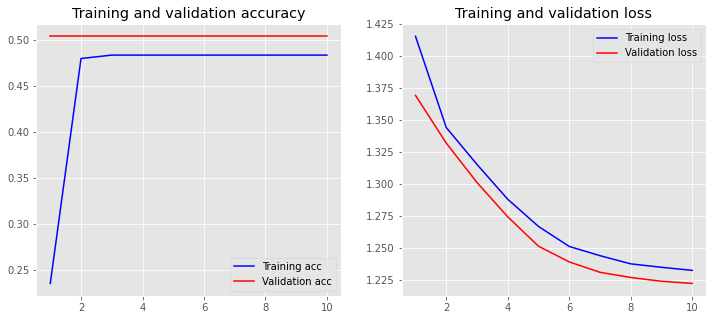

In [35]:
plot_history(history)